In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [2]:
# increasing limit to remove max rows and columns at once
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# importing credit csv file
df = pd.read_csv("ratings_small.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
# priting the shape of the dataset
print("Shape of dataset: {}".format(df.shape))

Shape of dataset: (100004, 4)


In [5]:
# checking for column names
print("Column Names: {}".format(df.columns))

Column Names: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [6]:
# Checking for the Null Values
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

There are no null value to be treated

In [7]:
# Checking distribution of the data
df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


<AxesSubplot:>

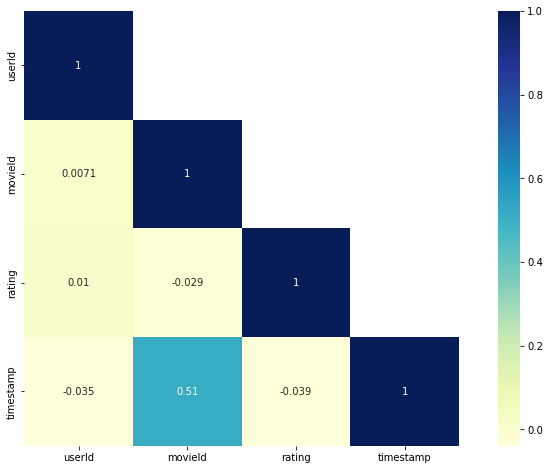

In [8]:
# Plotting Correlation
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.heatmap(corr, mask = mask, square = True, annot = True, cmap = 'YlGnBu')

There seems to be correlation at all from the above

userId         671
movieId       9066
rating          10
timestamp    78141
dtype: int64


<AxesSubplot:>

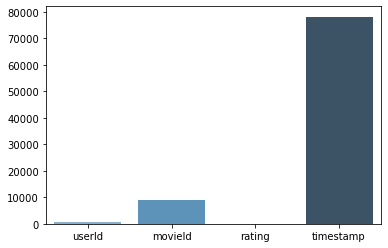

In [9]:
# Checking for unique counts of each column
print(df.nunique(axis = 0))
sns.barplot(x = df.columns, y = df.nunique(axis = 0), palette = 'Blues_d')

<AxesSubplot:ylabel='Frequency'>

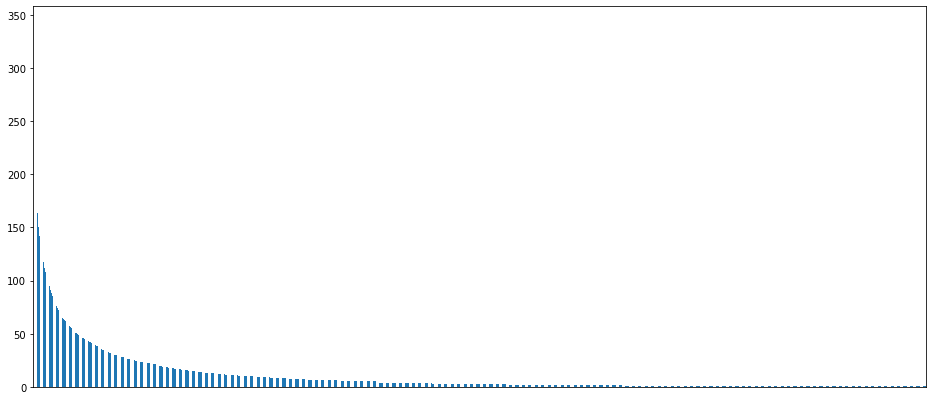

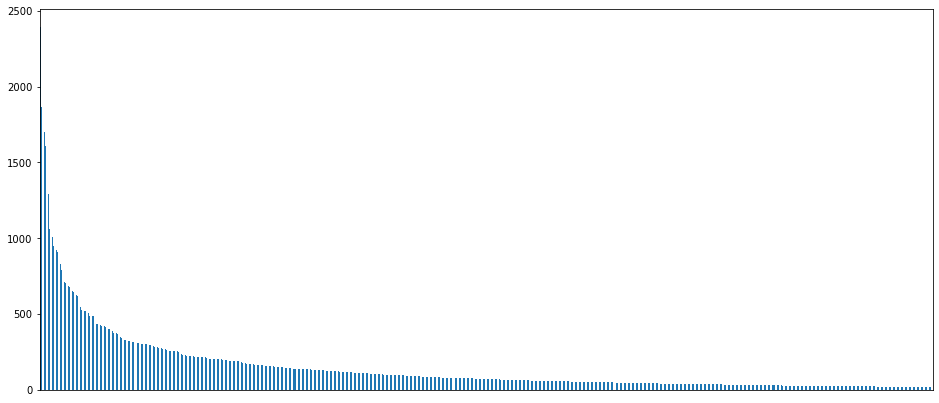

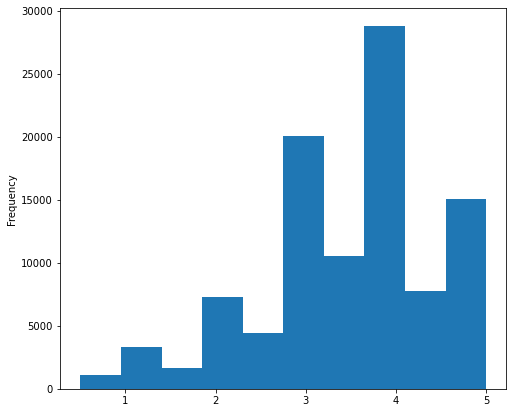

In [10]:
# Univariate Analysis
# Checking the spread of the data for each column
plt.figure(1, figsize = (16,7))
x_ax = plt.gca()
x_ax.get_xaxis().set_visible(False)
df['movieId'].value_counts().plot(kind = 'bar')

plt.figure(2, figsize = (16,7))
x_ax = plt.gca()
x_ax.get_xaxis().set_visible(False)
df['userId'].value_counts().plot(kind = 'bar')

plt.figure(3, figsize = (8,7))
df['rating'].plot(kind = 'hist')

In [11]:
# Feature Engineering
# Creating use by movies matrix
movie_rating_set = pd.crosstab(index = df.userId, columns = df.movieId,
                              values = df.rating, aggfunc = np.mean)
movie_rating_set

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,52,53,54,55,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,76,77,78,79,80,81,82,83,84,85,86,87,88,89,92,93,94,95,96,97,98,99,100,101,102,103,104,105,107,108,110,111,112,113,114,116,117,118,119,121,122,123,124,125,126,129,130,131,132,135,137,140,141,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,183,184,185,186,187,188,189,190,191,193,194,195,196,198,199,200,201,202,203,204,205,206,207,208,209,211,213,214,215,216,217,218,219,220,222,223,224,225,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,...,130642,130682,130960,130970,130980,131013,131168,131451,131714,131724,131830,132046,132074,132146,132157,132333,132462,132480,132488,132496,132618,132796,132888,132952,132961,133195,133281,133295,133365,133377,133419,133545,133645,133771,133782,133798,133824,134025,134130,134158,134170,134246,134368,134393,134528,134569,134783,134853,134859,134881,135133,135137,135264,135266,135268,135436,135508,135518,135532,135536,135567,135569,135861,135887,136016,136018,136020,136305,136445,136447,136449,136562,136592,136598,136602,136654,136666,136800,136816,136864,137337,137403,137595,137857,138036,138204,138208,138258,138546,138696,138698,139116,139130,139385,139415,139620,139642,139644,139757,139855,139915,140110,140152,140174,140237,140247,140265,140267,140523,140711,140715,140725,140739,140741,140743,140745,140747,140749,140751,140753,140755,140757,140759,140761,140763,140816,140880,140928,141124,141422,141668,141688,141718,141749,141866,141886,141890,141956,142068,142192,142240,142258,142422,142448,142488,142507,142536,142997,143255,143257,143377,143385,143410,143472,143657,143859,144620,144714,144976,145150,145307,145775,145839,145935,146309,146443,146501,146604,146656,146682,146688,147006,147010,147037,147426,147845,148168,148238,148372,148626,148652,148881,148888,148956,149352,149354,149406,149532,149572,149590,149606,149612,149830,150401,150548,150856,151307,151639,152017,152025,152057,152077,152079,152081,152091,152173,152844,153584,155392,155611,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### What is Matrix Factorization?
##### Content Based Filtering
Matrix Factorization is a way to generate latent features when mulitplying two different kinds of entities. <br>
Assuming There are 5 users - 5 movies and ratings range from 1-5, then the matrix formed: <br>
<img src="matrix.png" width="800" height="400"> <br>
Since not every user gives rating hence, there are lot of Null Values which will be replaced with 0. <br> 
From above table, we found user1 and user3 both gave high ratings to movie2 and movie3. <br>
Matrix Factorization helps identify latent features to give prediction on a rating w.r.t similarity in user's preference and interactions. <br>
<b> Source: </b> https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b 

## Recommender System
Two algorithms will be further implemented <br>
- <b>K Nearest Neighbor (KNN)</b> <br>
- <b>Singular Value Decomposition (SVD)</b>

In [12]:
from surprise import Dataset
from surprise import Reader

### What is Surprise Library?
It is a python scikit for building analyzing recommender systems that deal with explicit rating data. <br>
<b> SurPRISE </b> stands for Simple Python Recommendation System Engine <br>

In [14]:
reader = Reader(rating_scale = (0, 5))
rating_df = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

<b> Reader Class </b>is used to parse a file containing ratings <br>
Each line need to respect the following structure <br>
user ; item ; rating ; [timestamp]

In [15]:
# Implementing K-Nearest Neighbors, SVD
from surprise import KNNWithMeans
from surprise import SVD

In [18]:
# KNN
similarity = { "name": "cosine",
             "user_based": False, }
knn = KNNWithMeans(sim_options = similarity)

In [19]:
# SVD
svd = SVD()

In [21]:
# Method 1
# Model Evaluation
from surprise.model_selection import cross_validate
cross_validate_Knn = cross_validate(knn, rating_df,
                                   measures = ['RMSE', 'MAE'],
                                   cv = 5,
                                   verbose = True)
cross_validate_svd = cross_validate(svd, rating_df,
                                   measures = ['RMSE', 'MAE'],
                                   cv = 5, verbose = True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9234  0.9252  0.9276  0.9290  0.9337  0.9278  0.0036  
MAE (testset)     0.7072  0.7098  0.7097  0.7118  0.7146  0.7106  0.0025  
Fit time          31.79   31.28   31.29   31.27   29.80   31.09   0.67    
Test time         14.12   13.07   14.76   13.36   13.08   13.68   0.66    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8957  0.9015  0.9001  0.9003  0.8

In [32]:
# Method 2
# Train-test split, then evaluate
from surprise.model_selection import train_test_split
from surprise import accuracy


# Defining Train test function
def train_test_algo(algo, label):
    training_set, testing_set = train_test_split(rating_df,
                                                test_size = 0.2)
    algo.fit(training_set)
    test_output = algo.test(testing_set)
    test_df = pd.DataFrame(test_output)
    
    # evaluation
    print("RMSE: ", label, accuracy.rmse(test_output, verbose = False))
    print("MAE: ", label, accuracy.mae(test_output, verbose = False))
    print("MSE: ", label, accuracy.mse(test_output, verbose = False))
    
    return test_df
    
train_test_knn = train_test_algo(knn, "Algo_KNN")
print(train_test_knn.head())
print("")    
train_test_svd = train_test_algo(svd, "Algo_SVD")
print(train_test_svd.head())
print("")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE:  Algo_KNN 0.9361919706729963
MAE:  Algo_KNN 0.7155901325907715
MSE:  Algo_KNN 0.8764554059525884
   uid    iid  r_ui       est                                    details
0   15  56367   2.0  3.016683  {'actual_k': 40, 'was_impossible': False}
1  196   3681   3.0  4.190998  {'actual_k': 40, 'was_impossible': False}
2  380   6281   2.5  3.456211  {'actual_k': 40, 'was_impossible': False}
3  500  54259   4.5  3.263810  {'actual_k': 40, 'was_impossible': False}
4  641    832   5.0  4.003543  {'actual_k': 40, 'was_impossible': False}

RMSE:  Algo_SVD 0.8955458079153136
MAE:  Algo_SVD 0.6923958826567255
MSE:  Algo_SVD 0.8020022940746918
   uid   iid  r_ui       est                    details
0  666   588   3.0  3.038360  {'was_impossible': False}
1  580  7766   4.0  3.478851  {'was_impossible': False}
2  603   595   5.0  4.010923  {'was_impossible': False}
3  588   480   3.0  3.722014  {'was_impossible': False}

### Making Recommendations


In [33]:
# joinig with movie data
movie_df = pd.read_csv("movies_metadata.csv")
links_df = pd.read_csv("links.csv")

C:\Users\Saurav\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
movie_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [38]:
print("Column Names (Movie df): {}".format(movie_df.columns))

Column Names (Movie df): Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'], dtype='object')


In [ ]:
# removing tt from the imdb dataset
movie_df['imdb_id'] = movie_df['imdb_id'].apply(lambda x: str(x)[2:].lstrip("0"))

In [49]:
links_df['imdbId'] = links_df['imdbId'].astype(str)

In [40]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [39]:
print("Column Names (Link df): {}".format(links_df.columns))

Column Names (Link df): Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


In [43]:
movie_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                      0
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [44]:
movie_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [45]:
# predict all movie ratings for K users
def prediction(algo, users_K):
    pred_list = []
    for userId in range(1,users_K):
        for movieId in range(1,9067):
            rating = algo.predict(userId, movieId).est
            pred_list.append([userId, movieId, rating])
    pred_df = pd.DataFrame(pred_list, columns = ['userId', 'movieId', 'rating'])
    return pred_df

In [46]:
# top recommendations provided by sorted ratings 
def top_recommendations(pred_df, top_N):
    link_movie = pd.merge(pred_df, links_df, how='inner', left_on='movieId', right_on='movieId')
    recommended_movie = pd.merge(link_movie, movie_df, how='left', left_on='imdbId', right_on='imdb_id')[['userId', 'movieId', 'rating', 'movieId','imdb_id','title']]
    sorted_df = recommended_movie.groupby(('userId'), as_index = False).apply(lambda x: x.sort_values(['rating'], ascending = False)).reset_index(drop=True)
    top_recommended_movies = sorted_df.groupby('userId').head(top_N)
    return sorted_df, top_recommended_movies

In [50]:
# KNN predictions
pred_KNN = prediction(knn, 10)
recommended_movies_KNN, top_recommended_movies_KNN = top_recommendations(pred_KNN, 3)

# SVD predictions
pred_SVD = prediction(svd, 10)
recommended_movies_SVD, top_recommended_movies_SVD = top_recommendations(pred_SVD, 3)

In [51]:
top_recommended_movies_KNN

,userId,movieId,rating,movieId,imdb_id,title
0,1,8208,5.0,8208,38873,The Razor's Edge
1,1,3575,5.0,3575,156460,Defying Gravity
2,1,872,5.0,872,109066,Vive L'Amour
8341,2,1312,5.0,1312,116293,Female Perversions
8342,2,3746,5.0,3746,188030,Butterfly
8343,2,4442,5.0,4442,89461,The Last Dragon
16682,3,2636,5.0,2636,37099,The Mummy's Ghost
16683,3,4338,5.0,4338,41996,Twelve O'Clock High
16684,3,4755,5.0,4755,118178,Wish Upon a Star
25023,4,4338,5.0,4338,41996,Twelve O'Clock High


In [52]:
top_recommended_movies_SVD

,userId,movieId,rating,movieId,imdb_id,title
0,1,318,3.899875,318,111161,The Shawshank Redemption
1,1,2542,3.861202,2542,120735,"Lock, Stock and Two Smoking Barrels"
2,1,858,3.839058,858,68646,The Godfather
8341,2,969,4.503814,969,43265,The African Queen
8342,2,858,4.488599,858,68646,The Godfather
8343,2,2318,4.483644,2318,147612,Happiness
16682,3,318,4.274162,318,111161,The Shawshank Redemption
16683,3,2542,4.223316,2542,120735,"Lock, Stock and Two Smoking Barrels"
16684,3,4011,4.222324,4011,208092,Snatch
25023,4,905,5.000000,905,25316,It Happened One Night
